### Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. <br>
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


### Описание данных
Гипотезы - /datasets/hypothesis.csv. <br><br>
<li>Hypothesis — краткое описание гипотезы;
<li>Reach — охват пользователей по 10-балльной шкале;
<li>Impact — влияние на пользователей по 10-балльной шкале;
<li>Confidence — уверенность в гипотезе по 10-балльной шкале;
<li>Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
<br><br>
Файл /datasets/orders.csv. 
<br><br>
<li>transactionId — идентификатор заказа;
<li>visitorId — идентификатор пользователя, совершившего заказ;
<li>date — дата, когда был совершён заказ;
<li>revenue — выручка заказа;
<li>group — группа A/B-теста, в которую попал заказ.
<br><br>
Файл /datasets/visitors.csv. 
<br><br>
<li>date — дата;
<li>group — группа A/B-теста;
<li>visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Приоритизация гипотез

Прежде чем начну задание, проведу класическую предобработку

In [1]:
# Загружаю библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st
import math
pd.options.display.max_colwidth = 150

In [2]:
# Загружаю датафреймы
try:
    hypothesis = pd.read_csv(r'./datasets/hypothesis.csv')
    orders = pd.read_csv(r'./datasets/orders.csv')
    visitors = pd.read_csv(r'./datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hypothesis.info()
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

In [4]:
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
display(hypothesis.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [6]:
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

In [7]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)

In [8]:
# Применяю фреймворк ICE для приоритизации гипотез. Сортирую по убыванию приоритета.
hypothesis['ICE'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'],2)
hypothesis.sort_values('ICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


In [9]:
# Применяю фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False).head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


ICE не учитывает охват, тогда как RICE учитывает охват, из-за этого метрики отличаются

Топ-5 гипотез по фреймворку ICE, являются гипотезы под номерами 8; 0; 7; 6; 2.

При смене фреймворка на RICE, топ-5 остается прежним, но со смещенными местами в виде: 7; 2; 0; 6; 8

### Анализ A/B-теста

In [10]:
# Удаляю дубли
dubles = orders.groupby(['visitorid']).agg({'group':'nunique', 'transactionid':'count', 'revenue':'sum'}).reset_index()
dubles_list = list(dubles[dubles.group != 1]['visitorid'])
print(len(dubles_list))
orders = orders.query('visitorid not in @dubles_list')

58


In [11]:
# Групирую заказы и формирую кумулятивную выручку по группам
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                   .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                   .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,23,19,142779,719,6207.782609,0.031989
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843
2,2019-08-02,A,42,37,234381,1338,5580.500000,0.031390
3,2019-08-02,B,40,39,221801,1294,5545.025000,0.030912
4,2019-08-03,A,66,61,346854,1845,5255.363636,0.035772


#### Постройте график кумулятивной выручки по группам.

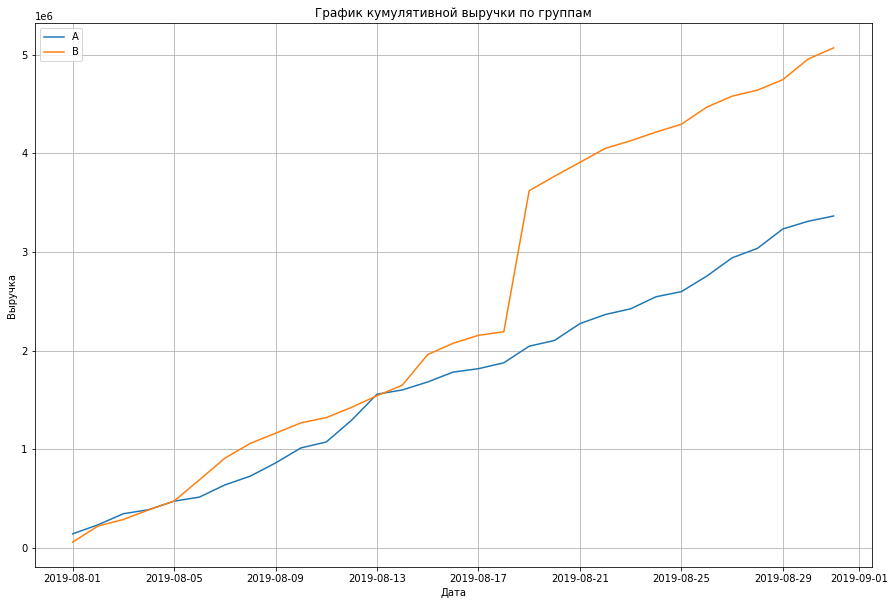

In [13]:
plt.figure(figsize=(15,10))
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A')
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

B - обладает выбросом, тогда как А - растет без сильных выбросов

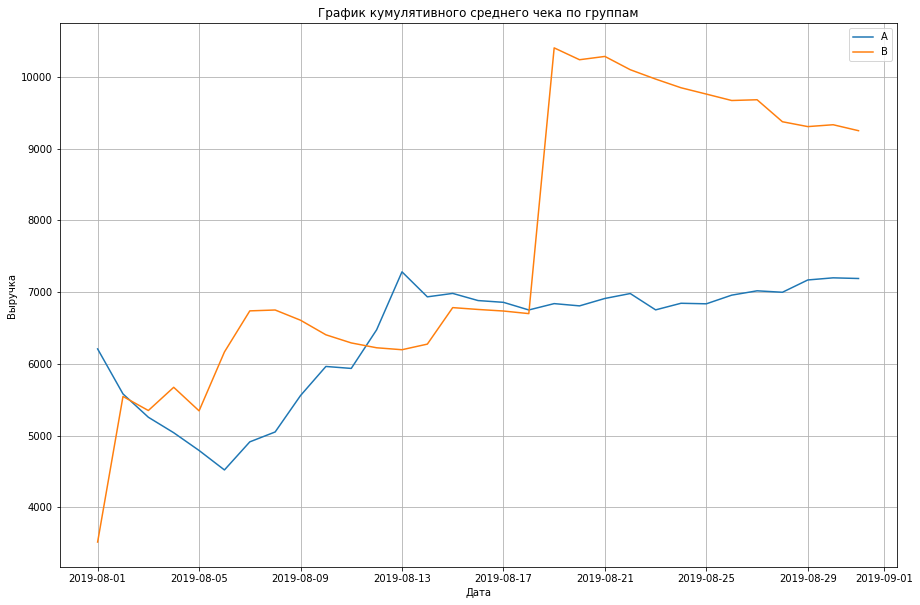

In [ ]:
# Строю график кумулятивного среднего чека по группам
plt.figure(figsize=(15,10))
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A')
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()
plt.show()

B - обладает выбросом, тогда как А - растет без сильных выбросов

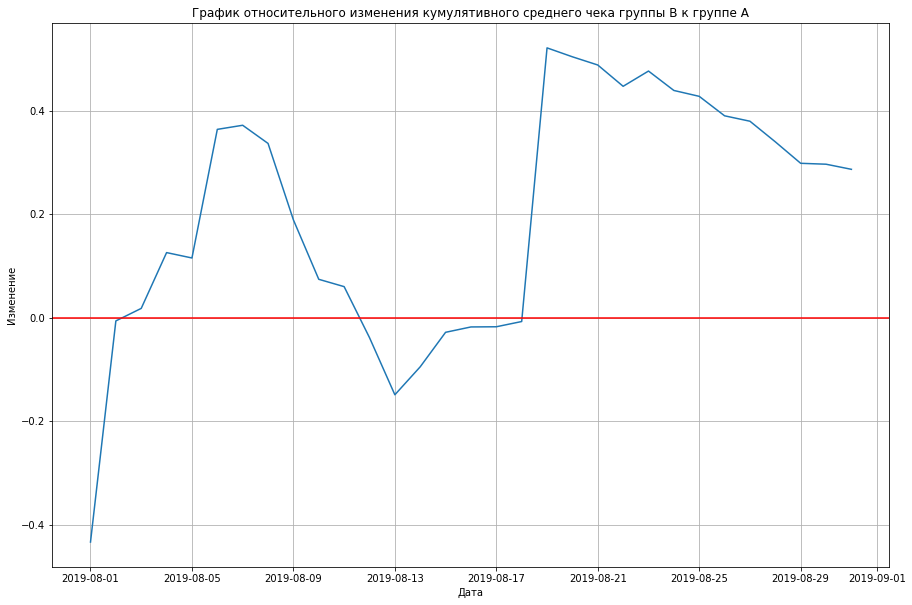

In [ ]:
# Строю график относительного изменения кумулятивного среднего чека группы B к группе A.
orders_agg = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))

plt.figure(figsize=(15,10))
plt.plot(orders_agg['date'], orders_agg['average_check_B'] / orders_agg['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение')
plt.axhline(y=0, color='red', linestyle='-')
plt.grid()
plt.show()

Также замечены всплески

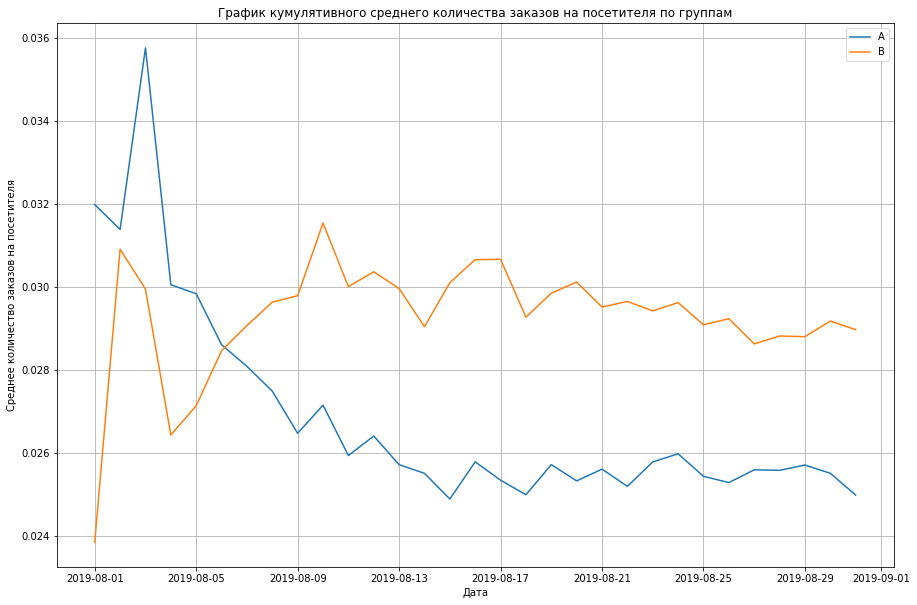

In [16]:
# Постройте график кумулятивного среднего количества заказов на посетителя по группам.
plt.figure(figsize=(15,10))
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A')
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

Обе группы стабилизировались. Группа B показывает стабильно результат выше, нежели группа А

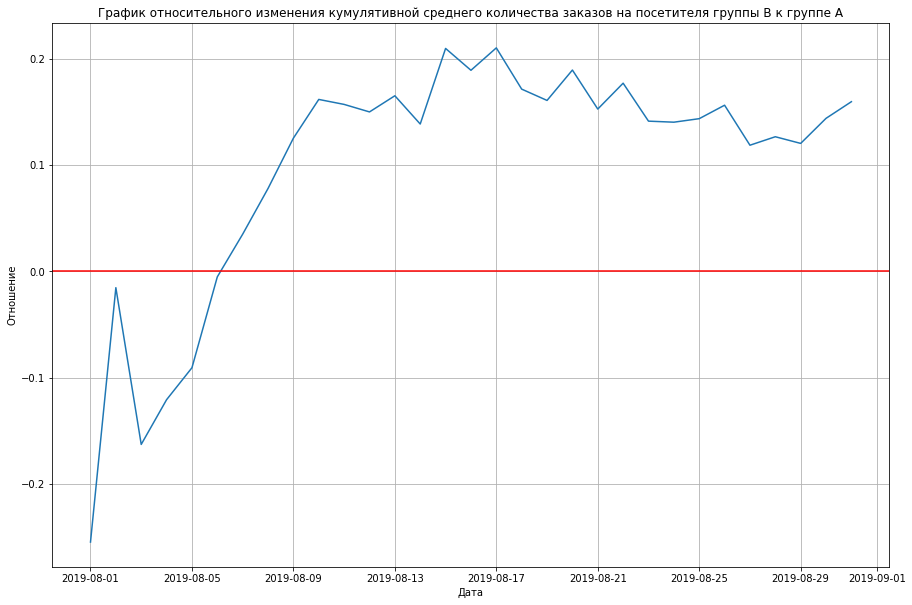

In [17]:
# Строю график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.figure(figsize=(15,10))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивной среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.axhline(y=0, color='red', linestyle='-')
plt.grid()
plt.show()

Конверсия в группе B стабильно лучше конверсии в группе A на 10% спустя 9 дней после начала

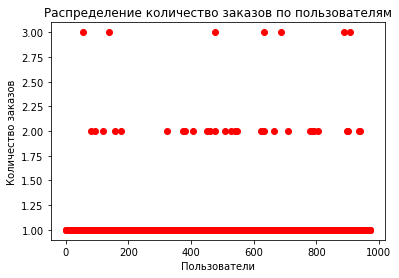

In [ ]:
# Строю точечный график количества заказов по пользователям.
ordersByUsers = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))
plt.scatter(x_values, ordersByUsers['orders'], color='red')
plt.title('Распределение количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

В основном пользователи делают один заказ, несколько человек - 2 заказа и 6 человек сделали 3 заказа.

In [ ]:
# Считаю 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))
print(ordersByUsers['orders'].max())
outlaws_1p = ordersByUsers[ordersByUsers['orders'] >= 4]['visitorid'].to_list()

[1. 2.]
3


99 перцентиль является хорошей границей для определения аномальных пользователей

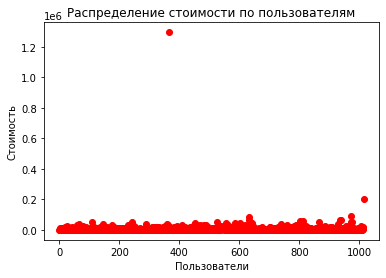

In [20]:
# Строю точечный график стоимостей заказов.
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.title('Распределение стоимости по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость')
plt.show()

Есть всего лишь 2 заказа, которые являются выбросами

#### Посчитайте 95-й и 99-й перцентили стоимости заказов.

In [21]:
print(np.percentile(orders['revenue'], [95, 99]))
print(orders['revenue'].max())

[26785. 53904.]
1294500


99 перцентиль является хорошей границей для определения аномальных пользователей

#### Необходимо посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [22]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})
ordersByUsersB.columns = ['visitorid', 'orders']

list_orders_1 = []
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(ordersByUsersA))):
    list_orders_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_orders_1, name = 'orders')

list_orders_2 = []
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(ordersByUsersB))):
    list_orders_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_orders_2, name = 'orders')
sampleA = pd.concat([ordersByUsersA['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], orders_by_non_purchased_users_B], axis=0)

    H0: Отсутствуют статистически значимые различия в среднем количестве заказов на посетителя между группами
    H1: Статистически значимые различия в среднем количестве заказов на посетителя между группами есть

In [23]:
alpha=0.05
p_value = st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# Вычисление разницы среднего количества заказов
print(sampleB.mean()/sampleA.mean()-1)

p-значение:  0.011018084110014696
Отвергаем нулевую гипотезу
0.1597977924896936


p-value значительно больше 0.05 из-за чего мы не можем отвергнуть нулевую гипотезу. Статистических значимых различий нет.
Количество заказов на посетителя между группами различаются на 16%

#### Считаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Воспользуемся критерием Манна-Уитни

    H0: Отсутсвуют статистические значимые различия между группами в среднем чеке заказа
    H1: Статистически значимые различия между группами в среднем чеке заказа есть

In [24]:
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'], 
                                       alternative="two-sided")[1]
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
# Вычисление разницы среднего чека
print(orders[orders['group']=='B']['revenue'].mean()/
                       orders[orders['group']=='A']['revenue'].mean()-1)

p-значение:  0.8294908998149533
Не получилось отвергнуть нулевую гипотезу
0.28660287636871096


P-value больше 0.05, статистически значимых различий в чеке нет. Хотя относительное различие среднего чека между группами больше 28%.

#### Считаю статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

    H0: Отсутствуют статистически значимые различия в среднем количестве заказов на посетителя между группами
    H1: Статистически значимые различия в среднем количестве заказов на посетителя между группами есть

In [26]:
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_A], axis = 0)
sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'],
    orders_by_non_purchased_users_B], axis = 0)
p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative="two-sided")[1]
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(sampleBFiltered.mean() / sampleAFiltered.mean()-1)

p-значение:  0.007021302207652193
Отвергаем нулевую гипотезу
0.18920780766034584


    p-value меньше 0.05, поэтому мы не можем отвергать нулевую гипотезу о том, что значимых различий между группами нет.
    Преимущество группы В над группой А составляет 19%

#### Считаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Воспользуемся критерием Манна-Уитни

    H0: Отсутсвуют статистические значимые различия между группами в среднем чеке заказа
    H1: Присутствуют статистические значимые различия между группами в среднем чеке заказа

In [27]:
p_value = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A',\
                                                   np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', \
                                                   np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'])[1]
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue'].mean()-1)

p-значение:  0.7877044862440841
Не получилось отвергнуть нулевую гипотезу
-0.0323351256932487


    p-value значительно больше 0.05, что значит, что между группами есть статистические знамимые различия в среднем чеке
    Группа B после чистки данных уступила группе А на 3 процента по среднему чеку в заказах

#### Вывод

    График кумулятивного среднего количества заказов на посетителя показал, что результаты группы B намного лучше результатов группы А и зафиксировались на достаточном уровне
    Из графика среднего чека нельзя сделать таких же выводов из-за наличия выбросов
    
    Различия между средним количеством заказов на посетителя появились только после "очистки данных" и составляют 17%
    Различий по среднему чеку почти не наблюдается
    
    Из имеющихся данных, я считаю, что тест можно остановить, т.к. прошло достаточно много времени, данные мало видоизменяются и собранных данных достаточно. Был зафиксирован прирост среднего количества заказов в группе B. На среднем чеке гипотеза не дала подтверждения